
Image Segmantation 을 위해 segNet 모델을 사용해 배경과 옷을 분리한 후 color clustering 진행

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import Image

import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# 이미지 불러오기
img=cv2.imread('/content/gdrive/My Drive/청치마_흰배경.jpg')
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 변환 graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# 임계값 조절
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# mask
mask = 255 - mask

In [ ]:
# morphology 적용
# borderconstant 사용
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

In [ ]:
# anti-alias the mask
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

In [ ]:
# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

In [ ]:
# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

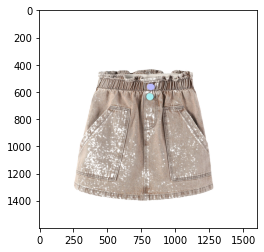

In [ ]:
# 저장 원하는 경로와 이름 지정해서 저장하면 됨
cv2.imwrite('/content/gdrive/My Drive/청치마_사람.png', result)

plt.imshow(result)

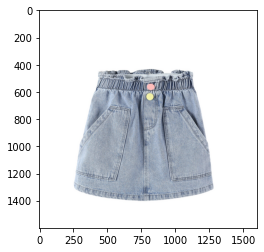

In [ ]:
img = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(img)

새로 로드해서 사용할 때에는 BRG2RBG 변환해줘야 함. 안해주면 아래 출력처럼 R,B 값이 바뀌어서 나옴.

#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)    코드 사용하면 됨


꼭 새로 로드할 필요 없이 바로 result 값 가져다가 사용해도 됨.

K-means clustering 위해 필요한 라이브러리들은 위에 import 되어있는 것들이 전부